<a href="https://colab.research.google.com/github/apexro45/WEEK-3/blob/main/WEEK3_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import io

In [15]:
df = pd.read_csv("/content/chipotle.tsv", sep='\t')

In [17]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [10]:
df.shape


(4622, 5)

 Display missing values

In [19]:
missing_values = df.isnull().sum()


print("Missing values in each column:")
print(missing_values)

Missing values in each column:
order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


In [21]:
df['choice_description'].fillna('No Description', inplace=True)


In [22]:
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object


In [23]:
unique_values = df.nunique()
print("\nUnique values in each column:")
print(unique_values)


Unique values in each column:
order_id              1834
quantity                 9
item_name               50
choice_description    1044
item_price              78
dtype: int64


In [24]:
df['quantity'] = df['quantity'].astype(int)


In [26]:
df['item_price'] = pd.to_numeric(df['item_price'].str.replace('$', ''), errors='coerce')


<ipython-input-26-f192e3e496a9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price'] = pd.to_numeric(df['item_price'].str.replace('$', ''), errors='coerce')


In [29]:

updated_data_types = df.dtypes
print("Updated Data types of each column:")
print(updated_data_types)



Updated Data types of each column:
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object


In [31]:
# Identify duplicated rows
duplicated_rows = df[df.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)


Duplicated Rows:
      order_id  quantity                            item_name  \
238        103         1                        Steak Burrito   
248        108         1                          Canned Soda   
297        129         1                        Steak Burrito   
381        165         1                    Canned Soft Drink   
484        205         1                         Chicken Bowl   
567        233         1                    Canned Soft Drink   
617        254         1                                Chips   
684        282         1                    Canned Soft Drink   
773        319         1                         Chicken Bowl   
908        376         1                        Steak Burrito   
924        381         1                   Chicken Soft Tacos   
1003       412         1                        Bottled Water   
1117       462         1                      Chicken Burrito   
1203       491         1                      Chicken Burrito   
1245    

# Aggregate data

In [33]:

aggregated_data = df.groupby(['order_id', 'item_name', 'choice_description', 'item_price'], as_index=False).agg({'quantity': 'sum'})


In [35]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  4622 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [36]:

print(df[['quantity', 'item_price']].describe())


          quantity   item_price
count  4622.000000  4622.000000
mean      1.075725     7.464336
std       0.410186     4.245557
min       1.000000     1.090000
25%       1.000000     3.390000
50%       1.000000     8.750000
75%       1.000000     9.250000
max      15.000000    44.250000


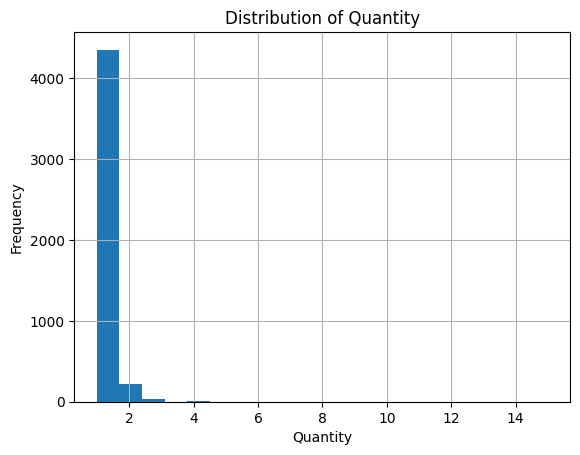

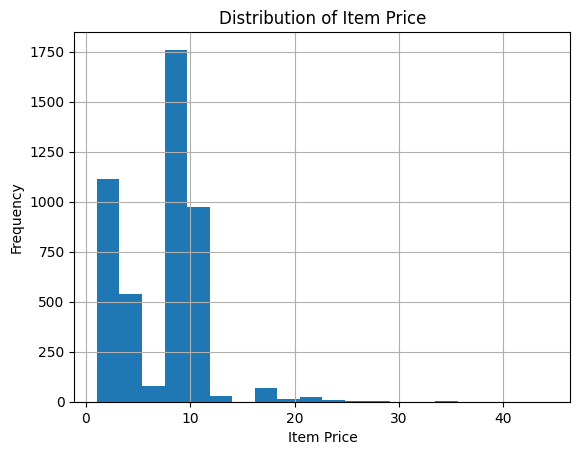

In [39]:
import matplotlib.pyplot as plt

# Visualize 'Quantity' distribution
df['quantity'].hist(bins=20)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Visualize 'Item Price' distribution
df['item_price'].hist(bins=20)
plt.title('Distribution of Item Price')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.show()


In [49]:

df['order_id'] = df['order_id'].astype(str)


duplicate_order_ids = df[df.duplicated(subset=['order_id'], keep=False)]
print("Duplicate Order IDs:")
print(duplicate_order_ids[['order_id']])


missing_order_ids = df[df['order_id'].isnull()]
print("\nMissing or Null Order IDs:")
print(missing_order_ids[['order_id']])


invalid_order_ids = df[~df['order_id'].str.isnumeric()]
print("\nInvalid Order IDs:")
print(invalid_order_ids[['order_id']])


unique_order_ids = df['order_id'].unique()
print("\nUnique Order IDs:")
print(unique_order_ids)


Duplicate Order IDs:
     order_id
0           1
1           1
2           1
3           1
5           3
...       ...
4617     1833
4618     1833
4619     1834
4620     1834
4621     1834

[4494 rows x 1 columns]

Missing or Null Order IDs:
Empty DataFrame
Columns: [order_id]
Index: []

Invalid Order IDs:
Empty DataFrame
Columns: [order_id]
Index: []

Unique Order IDs:
['1' '2' '3' ... '1832' '1833' '1834']


In [51]:

unique_item_names = df['item_name'].unique()
print("Unique Item Names:")
print(unique_item_names)


Unique Item Names:
['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili-Corn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and Tomatillo-Red Chili Salsa' 'Bowl'
 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' '

In [55]:
df['item_name'] = df['item_name'].str.lower().str.strip()



In [54]:
updated_unique_item_names = df['item_name'].unique()
print("\nUpdated Unique Item Names:")
print(updated_unique_item_names)




Updated Unique Item Names:
['chips and fresh tomato salsa' 'izze' 'nantucket nectar'
 'chips and tomatillo-green chili salsa' 'chicken bowl' 'side of chips'
 'steak burrito' 'steak soft tacos' 'chips and guacamole'
 'chicken crispy tacos' 'chicken soft tacos' 'chicken burrito'
 'canned soda' 'barbacoa burrito' 'carnitas burrito' 'carnitas bowl'
 'bottled water' 'chips and tomatillo green chili salsa' 'barbacoa bowl'
 'chips' 'chicken salad bowl' 'steak bowl' 'barbacoa soft tacos'
 'veggie burrito' 'veggie bowl' 'steak crispy tacos'
 'chips and tomatillo red chili salsa' 'barbacoa crispy tacos'
 'veggie salad bowl' 'chips and roasted chili-corn salsa'
 'chips and roasted chili corn salsa' 'carnitas soft tacos'
 'chicken salad' 'canned soft drink' 'steak salad bowl'
 '6 pack soft drink' 'chips and tomatillo-red chili salsa' 'bowl'
 'burrito' 'crispy tacos' 'carnitas crispy tacos' 'steak salad'
 'chips and mild fresh tomato salsa' 'veggie soft tacos'
 'carnitas salad bowl' 'barbacoa sala

In [56]:
print("\nSummary of 'Item Name' column:")
print(df['item_name'].value_counts())




Summary of 'Item Name' column:
chicken bowl                             726
chicken burrito                          553
chips and guacamole                      479
steak burrito                            368
canned soft drink                        301
steak bowl                               211
chips                                    211
bottled water                            162
chicken soft tacos                       115
chips and fresh tomato salsa             110
chicken salad bowl                       110
canned soda                              104
side of chips                            101
veggie burrito                            95
barbacoa burrito                          91
veggie bowl                               85
carnitas bowl                             68
barbacoa bowl                             66
carnitas burrito                          59
steak soft tacos                          55
6 pack soft drink                         54
chips and tomatillo red

Data Integrity Check:

In [64]:
print(df.head())


  order_id  quantity                              item_name  \
0        1         1           chips and fresh tomato salsa   
1        1         1                                   izze   
2        1         1                       nantucket nectar   
3        1         1  chips and tomatillo-green chili salsa   
4        2         2                           chicken bowl   

                                  choice_description  item_price  
0                                     No Description        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                     No Description        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  


In [66]:
item_summary = df.groupby(['item_name', 'choice_description']).agg({
    'quantity': 'sum',
    'item_price': 'mean'
}).reset_index()


In [67]:
print(item_summary.head())


           item_name choice_description  quantity  item_price
0  6 pack soft drink             [Coke]        21    6.490000
1  6 pack soft drink        [Diet Coke]        25    6.760417
2  6 pack soft drink         [Lemonade]         2    6.490000
3  6 pack soft drink           [Nestea]         2    6.490000
4  6 pack soft drink           [Sprite]         5    6.490000


In [68]:

merged_data = pd.merge(df, item_summary, on=['item_name', 'choice_description'], suffixes=('_original', '_grouped'))


discrepancies = merged_data[~((merged_data['quantity_original'] == merged_data['quantity_grouped']) & (merged_data['item_price_original'] == merged_data['item_price_grouped']))]
print("Rows with quantity or price discrepancies:")
print(discrepancies[['item_name', 'choice_description', 'quantity_original', 'quantity_grouped', 'item_price_original', 'item_price_grouped']])


Rows with quantity or price discrepancies:
                         item_name  \
0     chips and fresh tomato salsa   
1     chips and fresh tomato salsa   
2     chips and fresh tomato salsa   
3     chips and fresh tomato salsa   
4     chips and fresh tomato salsa   
...                            ...   
4532                    steak bowl   
4615              barbacoa burrito   
4616              barbacoa burrito   
4618                 steak burrito   
4619                 steak burrito   

                                     choice_description  quantity_original  \
0                                        No Description                  1   
1                                        No Description                  1   
2                                        No Description                  1   
3                                        No Description                  1   
4                                        No Description                  1   
...                             

In [70]:
df['quantity'] = df.groupby(['item_name', 'choice_description'])['quantity'].transform('sum')


In [74]:
csv_file_path = '/content/csv'

df.to_csv(csv_file_path, index=False, sep=',')

print(f"Cleaned dataset has been saved to: {csv_file_path}")

Cleaned dataset has been saved to: /content/csv
